<a href="https://colab.research.google.com/github/Luiz-01/AC2_RECONHECIMENTO-DE-PADROES/blob/main/Projeto_AC2_Regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pré Processamento de Dados

In [45]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.neural_network import MLPClassifier

from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

import random
from pprint import pprint


# Leitura dos dados do Dataset NFL
df_dataset = pd.read_csv('NFL QB Stats.csv', sep=',', index_col=None)

df_dataset.shape


(3177, 17)

Uma primeira impressão sobre os dados e os descritores estatísticos:

In [46]:
display(df_dataset.head(n=5))
display(df_dataset.describe())

,Year,Player,Pass Yds,Yds/Att,Att,Cmp,Cmp %,TD,INT,Rate,1st,1st%,20+,40+,Lng,Sck,SckY
0,2022,Patrick Mahomes,5250,8.1,648,435,67.1,41,12,105.2,272,42.0,73,13,67,26,188
1,2022,Justin Herbert,4739,6.8,699,477,68.2,25,10,93.2,228,32.6,50,7,55,38,206
2,2022,Tom Brady,4694,6.4,733,490,66.8,25,9,90.7,237,32.3,50,8,63,22,160
3,2022,Kirk Cousins,4547,7.1,643,424,65.9,29,14,92.5,230,35.8,47,10,66,46,329
4,2022,Joe Burrow,4475,7.4,606,414,68.3,35,12,100.8,219,36.1,53,10,60,41,259


,Year,Pass Yds,Yds/Att,Att,Cmp,Cmp %,TD,INT,Rate,1st,1st%,20+,40+,Lng,Sck,SckY
count,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000
mean,1996.540132,1704.224740,6.785615,245.350331,143.792572,56.746396,10.232295,8.340573,74.127856,75.975134,28.698709,18.350960,3.282971,56.800441,18.104501,126.402581
std,15.122372,1360.847951,1.794963,184.551518,115.432279,7.727250,9.546330,6.168180,20.282764,67.571655,10.481223,18.957776,3.817409,18.771205,13.648905,96.061336
min,1970.000000,37.000000,2.700000,2.000000,2.000000,11.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000
25%,1984.000000,463.000000,6.000000,75.000000,40.000000,52.300000,2.000000,3.000000,62.300000,16.000000,25.400000,2.000000,0.000000,43.000000,6.000000,43.000000
50%,1997.000000,1371.000000,6.800000,211.000000,117.000000,57.100000,7.000000,7.000000,75.600000,55.000000,31.100000,11.000000,2.000000,57.000000,16.000000,110.000000
75%,2009.000000,2797.000000,7.400000,400.000000,233.000000,61.600000,16.000000,13.000000,86.700000,128.000000,35.000000,33.000000,6.000000,72.000000,28.000000,194.000000
max,2022.000000,5477.000000,57.500000,733.000000,490.000000,100.000000,55.000000,35.000000,158.300000,289.000000,100.000000,81.000000,20.000000,99.000000,76.000000,489.000000


A partir dos dados será que existe uma relação entre Maiores jardas ao longo do tempo, Jardas em um periodo especifico e a idade dos jogadores.

In [47]:
df_dataset[['Sck', 'SckY', 'Lng']].groupby(['Lng'], as_index=False).mean().sort_values(by='Lng', ascending=False)

,Lng,Sck,SckY
88,99,30.333333,207.555556
87,98,25.666667,156.833333
86,97,23.000000,144.000000
85,96,33.250000,213.750000
84,95,32.666667,235.111111
...,...,...,...
4,15,2.500000,17.500000
3,14,2.000000,20.000000
2,13,0.500000,0.500000
1,12,2.000000,15.000000


In [48]:
df_dataset[['20+', '40+', 'Lng']].groupby(['Lng'], as_index=False).mean().sort_values(by='Lng', ascending=False)

,Lng,20+,40+
88,99,45.111111,9.555556
87,98,32.333333,6.000000
86,97,46.000000,11.750000
85,96,22.500000,4.750000
84,95,34.555556,8.222222
...,...,...,...
4,15,0.000000,0.000000
3,14,0.000000,0.000000
2,13,0.000000,0.000000
1,12,0.000000,0.000000


O processo de análise das variáveis pode continuar, o que é chamado de análise exploratória.
Em seguida, observados quais atributos podem ser interessante, a primeira etapa é remover os atributos que julgar desnecessários:

In [49]:
df_removed = df_dataset.drop(columns=['Player','Yds/Att', 'Att',	'Cmp',	'Cmp %', 'TD',	'INT',	'Rate',	'1st', '1st%'])
df_removed.shape

df_dummy =  df_removed

Em seguida, começa a própria etapa de aprendizagem, com a divisão de dados e finalmente a avaliação do modelo:

In [50]:
display(df_dummy.head())

,Year,Pass Yds,20+,40+,Lng,Sck,SckY
0,2022,5250,73,13,67,26,188
1,2022,4739,50,7,55,38,206
2,2022,4694,50,8,63,22,160
3,2022,4547,47,10,66,46,329
4,2022,4475,53,10,60,41,259


Análise Exploratória de Dados (EDA)

Separando a classe dos atributos

In [51]:
X_columns = df_dummy.columns.tolist()
X_columns.remove('Lng')

display(X_columns)

X = df_dummy[X_columns]
y = df_dummy.Lng

display(X.shape)
display(y.shape)

['Year', 'Pass Yds', '20+', '40+', 'Sck', 'SckY']

(3177, 6)

(3177,)

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2019)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(2223, 6)
(954, 6)
(2223,)
(954,)


Utilizando os vizinhos próximos a partir do Scikit-Learn:

In [53]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [54]:
y_pred = knn.predict(X_test)

In [55]:
y_pred

array([90, 51, 66, 64, 65, 36, 60, 75, 64, 58, 68, 67, 48, 40, 81, 55, 52,
       38, 42, 57, 69, 50, 54, 51, 87, 65, 90, 57, 55, 80, 28, 35, 59, 76,
       84, 46, 60, 59, 82, 22, 61, 77, 46, 38, 44, 69, 20, 59, 48, 57, 64,
       60, 64, 63, 57, 69, 67, 79, 88, 35, 98, 49, 55, 76, 46, 40, 74, 65,
       35, 59, 61, 54, 62, 67, 50, 89, 84, 61, 61, 61, 84, 45, 73, 65, 70,
       50, 46, 76, 20, 51, 67, 69, 42, 61, 52, 34, 47, 63, 50, 32, 34, 55,
       28, 91, 83, 82, 62, 64, 46, 61, 50, 72, 80, 67, 70, 58, 53, 70, 84,
       22, 74, 60, 71, 32, 34, 57, 59, 68, 52, 53, 34, 54, 26, 17, 80, 76,
       43, 49, 91, 63, 44, 69, 77, 58, 78, 44, 47, 13, 75, 29, 89, 44, 25,
       70, 62, 46, 70, 76, 42, 51, 28, 46, 53, 53, 33, 53, 57, 56, 71, 81,
       64, 53, 63, 74, 64, 40, 30, 42, 68, 67, 61, 51, 22, 47, 52, 41, 91,
       52, 44, 32, 28, 67, 64, 64, 85, 51, 61, 42, 47, 44, 80, 50, 89, 59,
       53, 72, 48, 65, 64, 66, 41, 58, 57, 39, 34, 41, 37, 71, 55, 53, 64,
       37, 68, 41, 50, 34

# Dividir os dados em conjuntos de treinamento e teste

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2019)

Modelos de Classificação

Regressão Linear

Epoch 1/16
70/70 [==============================] - 1s 11ms/step - loss: 53.5597 - val_loss: 49.3186
Epoch 2/16
70/70 [==============================] - 0s 6ms/step - loss: 46.5414 - val_loss: 42.3832
Epoch 3/16
70/70 [==============================] - 0s 4ms/step - loss: 39.5771 - val_loss: 35.5078
Epoch 4/16
70/70 [==============================] - 0s 3ms/step - loss: 32.7273 - val_loss: 28.6955
Epoch 5/16
70/70 [==============================] - 0s 3ms/step - loss: 25.9729 - val_loss: 22.1973
Epoch 6/16
70/70 [==============================] - 0s 3ms/step - loss: 19.9116 - val_loss: 17.2858
Epoch 7/16
70/70 [==============================] - 0s 3ms/step - loss: 15.7006 - val_loss: 14.0494
Epoch 8/16
70/70 [==============================] - 0s 4ms/step - loss: 13.3369 - val_loss: 12.3819
Epoch 9/16
70/70 [==============================] - 0s 4ms/step - loss: 12.0953 - val_loss: 11.5152
Epoch 10/16
70/70 [==============================] - 0s 3ms/step - loss: 11.5641 - val_loss: 11.144

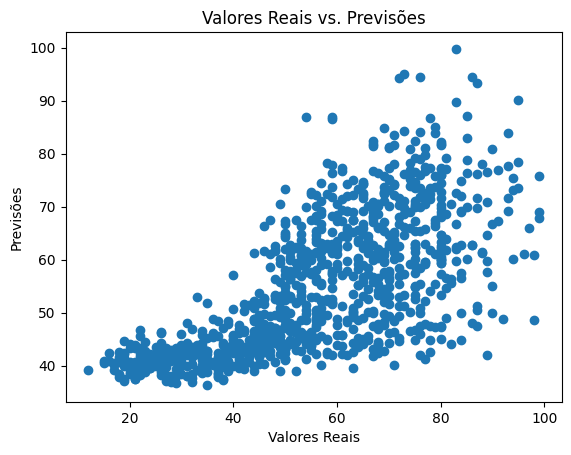

In [57]:
# Escolha um modelo e treine-o
normalizer = preprocessing.Normalization()
normalizer.adapt(X_train)

model = keras.Sequential([
    normalizer,
    layers.Dense(1)
])

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1), loss='mean_absolute_error')

# Faça previsões
history = model.fit(X_train, y_train,epochs=16, validation_data=(X_test, y_test))

# Avalie o modelo
y_pred = model.predict(X_test)
print("MSE: " , mean_squared_error(y_test, y_pred))
print("R2: " , r2_score(y_test, y_pred))

# Visualize os resultados
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Valores Reais vs. Previsões')
plt.show()

Arvore de Decissão

In [63]:
#Construindo a árvore de decisão

clf = DecisionTreeClassifier(criterion="entropy", random_state=2019)

clf.fit(X_train, y_train)

#Calculando o information gain
def information_gain(X, y, feature):
    """Calculates the information gain for a given feature.

    Args:
        X (numpy.ndarray): The training data.
        y (numpy.ndarray): The target labels.
        feature (int): The index of the feature to calculate information gain for.

    Returns:
        float: The information gain for the given feature.
    """

    # Calculate the entropy of the target labels

    entropy = entropy_of_labels(y)

    # Calculate the entropy of the target labels for each value of the feature

    values = np.unique(X[:, feature])
    entropies = []
    for value in values:
        X_subset = X[X[:, feature] == value]
        y_subset = y[X[:, feature] == value]
        entropy_subset = entropy_of_labels(y_subset)
        entropies.append(entropy_subset)

    # Calculate the weighted average entropy of the target labels for each value of the feature

    weighted_entropy = np.sum([entropy * len(X_subset) for entropy, X_subset in zip(entropies, split_data(X, feature, value))]) / len(X)

    # Calculate the information gain

    information_gain = entropy - weighted_entropy

    return information_gain


def entropy_of_labels(y):
    """Calculates the entropy of a set of labels.

    Args:
        y (numpy.ndarray): The labels.

    Returns:
        float: The entropy of the labels.
    """

    p = np.unique(y, return_counts=True)[1] / len(y)
    entropy = -np.sum(p * np.log2(p))

    return entropy


def split_data(X, feature, value):
    """Splits the data into two subsets based on a given feature value.

    Args:
        X (numpy.ndarray): The data.
        feature (int): The index of the feature to split on.
        value (object): The value of the feature to split on.

    Returns:
        tuple: A tuple of two subsets of the data, where the first subset contains all of the data points where the feature value is equal to the given value, and the second subset contains all of the data points where the feature value is not equal to the given value.
    """

    X_subset1 = X[X[:, feature] == value]
    X_subset2 = X[X[:, feature] != value]

    return X_subset1, X_subset2

#Classificando os dados de teste

y_pred = clf.predict(X_test)

#Avaliando a acurácia

accuracy = np.mean(y_test == y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.02830188679245283


Redes Neurais

In [71]:
# Regressão Logística no Scikit-Learn
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

from sklearn.metrics import f1_score

y_pred = model.predict(X_test)

f1 = f1_score(y_pred, y_test, average="micro")
print(f1)

for C in [-2, -1, 0, 1, 2]:

    C = 10 ** C

    model = LogisticRegression(C=C, max_iter=500, random_state=2021)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    #print(C, '->', f1_score(y_pred, y_test))

# Redes Neurais de Regressão
my_list = [1, 2, 3, 4, 5]

if 4 in my_list:
  my_list.remove(4)
from sklearn.model_selection import train_test_split

features.remove('Lng')
X = df_dummy[features]
y = df_dummy.Lng

y_pred = model.predict(X_test)

if y_pred.shape != y_test.shape:
  print("Error: The y_pred and y_test arrays have different shapes.")
else:
  f1 = f1_score(y_pred, y_test)
  print(f1)

X = df_dummy[features]
y = df_dummy.Lng

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

normalizer = preprocessing.Normalization()
normalizer.adapt(X_train.values)

model = keras.Sequential([
    normalizer,
    layers.Dense(10, activation='relu'),
    layers.Dense(7, activation='relu'),
    layers.Dense(5, activation='relu'),
    layers.Dense(1)
])

model.summary()

model.compile(optimizer='adam',
              loss='mean_absolute_error')

history = model.fit(
    X_train, y_train,
    epochs=50,
    validation_split=0.2,
    batch_size=8,
    verbose=0
)

plot_loss(history)

y_pred = model.predict(X_test).reshape(-1)

print(y_pred)

model.evaluate(X_test, y_test)

y_test.mean()

y_pred.mean()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.0440251572327044


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

ValueError: ignored